## IMPORTING LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns 
import matplotlib.pyplot as plt

Uploading Datasets

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving orders.csv to orders.csv


### Define Dataset Variables

In [5]:
df_aisle = pd.read_csv('aisles.csv')
df_dept = pd.read_csv('departments.csv')
df_product = pd.read_csv('products.csv')
df_order = pd.read_csv('orders.csv')
df_order_products_prior = pd.read_csv('order_products__prior.csv')
df_order_products_train = pd.read_csv('order_products__train.csv')

### Check Dataset Features (First 5 Row)

In [ ]:
df_aisle.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [ ]:
df_aisle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [ ]:
df_dept.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [ ]:
df_product.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [ ]:
df_order.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [ ]:
df_order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120.0,1.0,1.0
1,2,28985.0,2.0,1.0
2,2,9327.0,3.0,0.0
3,2,45918.0,4.0,1.0
4,2,30035.0,5.0,0.0


In [ ]:
df_order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302.0,1.0,1.0
1,1,11109.0,2.0,1.0
2,1,10246.0,3.0,0.0
3,1,49683.0,4.0,0.0
4,1,43633.0,5.0,1.0


## Check if any Missing Value

In [ ]:
missing_values = df_order.isnull().sum()

In [ ]:
percentage = missing_values/df_order.isnull().count()

In [ ]:
percentage

order_id                  0.000000
user_id                   0.000000
eval_set                  0.000000
order_number              0.000000
order_dow                 0.000000
order_hour_of_day         0.000000
days_since_prior_order    0.060276
dtype: float64

In [ ]:
df_order['eval_set'].value_counts()

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

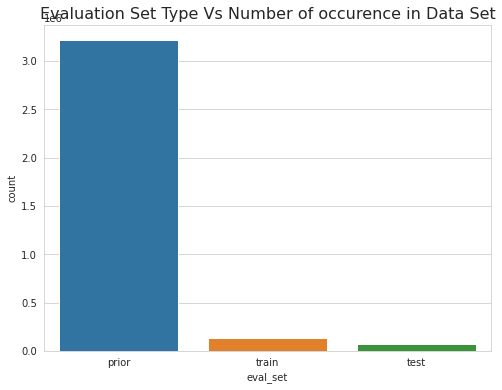

In [ ]:
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
ax= sns.countplot(x='eval_set', data= df_order)
ax.set_title('Evaluation Set Type Vs Number of occurence in Data Set', fontsize=16)

plt.show()

Below I tried to figure out What Day And Time that have peak order

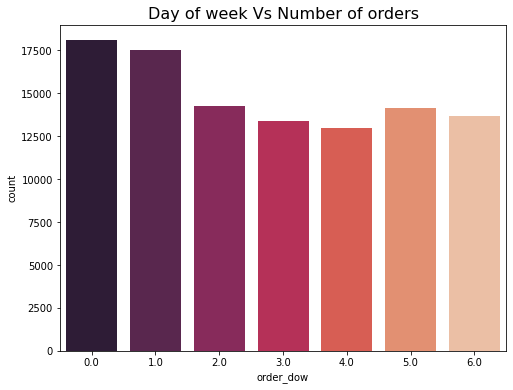

In [7]:
plt.figure(figsize=(8,6))
ax= sns.countplot(x='order_dow', data= df_order, palette='rocket')
ax.set_title('Day of week Vs Number of orders', fontsize=16)

plt.show()

From the Graph Above, maximum order that occur is on Sunday and Monday

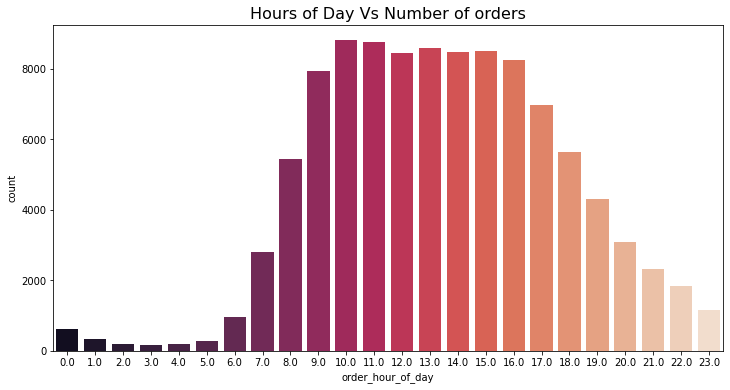

In [8]:
plt.figure(figsize=(12,6))
ax= sns.countplot(x='order_hour_of_day', data= df_order, palette='rocket')
ax.set_title('Hours of Day Vs Number of orders', fontsize=16)

plt.show()

We Can Also know from graph above that order will increase in 10-11 AM and 13-15 PM.

Below graph will show the date that have peak order:
most order occur on 7th day and 30th day.




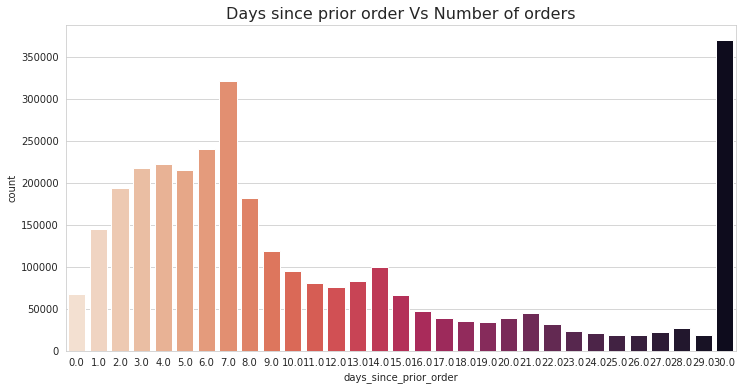

In [ ]:
plt.figure(figsize=(12,6))
ax= sns.countplot(x='days_since_prior_order', data= df_order, palette='rocket_r')
ax.set_title('Days since prior order Vs Number of orders', fontsize=16)

plt.show()

FEATURE ENGINEERING

In [10]:
order_grouped = df_order.groupby(['order_dow','order_hour_of_day'])['order_number'].aggregate('count').reset_index()

In [11]:
#Table no. of orders on all days of week
order_grouped= order_grouped.pivot('order_dow','order_hour_of_day', 'order_number')
order_grouped

order_hour_of_day,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
order_dow,,,,,,,,,,,,,,,,,,,,,,,,
0.0,112,68,43,32,21,31,101,351,816,1148,1419,1434,1570,1583,1657,1721,1527,1246,940,719,562,444,346,201
1.0,97,60,21,32,31,47,154,504,1005,1552,1620,1592,1486,1424,1402,1341,1327,1145,830,661,458,342,239,165
2.0,73,33,17,16,23,51,144,436,792,1136,1207,1237,1061,1208,1105,1117,1108,954,813,602,445,308,241,159
3.0,78,28,32,17,30,41,146,371,716,1029,1169,1136,1033,1054,997,1041,1057,931,769,560,428,334,227,152
4.0,74,41,27,18,29,41,155,390,695,1003,1115,1067,998,983,998,967,1006,902,776,566,426,305,261,137
5.0,86,51,18,18,20,49,170,426,737,1088,1180,1127,1149,1165,1152,1187,1090,931,789,620,395,278,245,164
6.0,93,55,42,30,35,31,94,331,683,980,1098,1164,1138,1182,1175,1135,1127,859,719,572,362,323,281,187


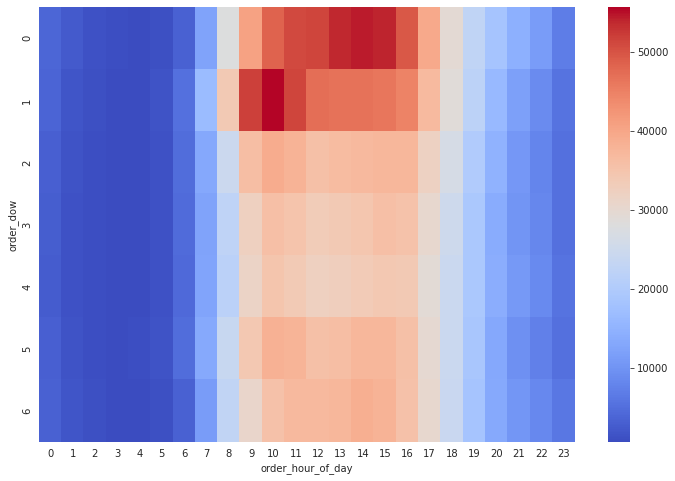

In [ ]:
#Heatmap for visualization
plt.figure(figsize=(12,8))
sns.heatmap(order_grouped, cmap='coolwarm')

From The Heatmap above we can see that peak order are on sunday  2 PM and Monday 10 AM

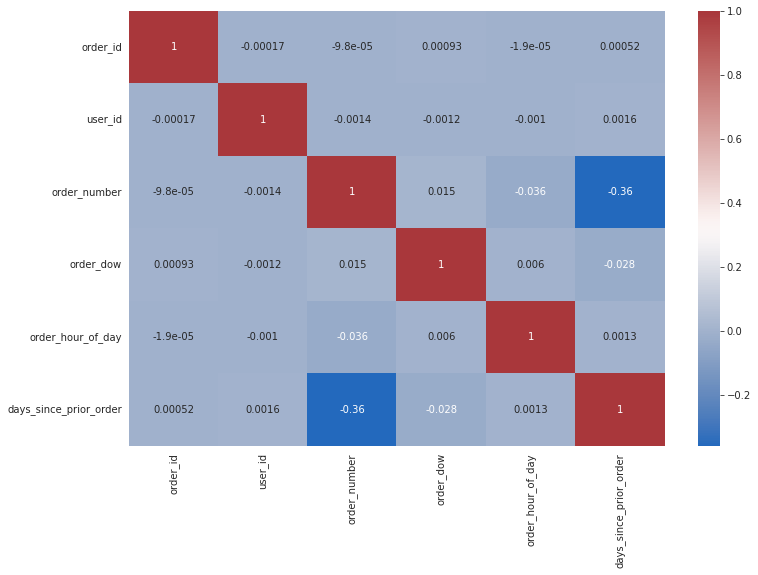

In [ ]:

plt.figure(figsize=(12,8))

sns.heatmap( df_order.corr(), cmap='vlag', annot=True)

In [ ]:
df_order_products_prior['reordered'].sum()/len(df_order_products_prior)

0.5902592649567159

In [ ]:
df_order_products_train['reordered'].sum()/len(df_order_products_train)

0.5977365235615161

In [ ]:
prior_train = pd.concat([df_order_products_prior, df_order_products_train]).sort_values(by=['order_id'])

In [ ]:
prior_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1136471 entries, 0 to 544912
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           1136471 non-null  int64  
 1   product_id         1136469 non-null  float64
 2   add_to_cart_order  1136469 non-null  float64
 3   reordered          1136469 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 43.4 MB


In [ ]:
#Merging with products dataframe
prior_train_orders = pd.merge(prior_train, df_product, on='product_id', how='left').sort_values(by=['order_id'])

In [ ]:
prior_train_orders.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,1,49302.0,1.0,1.0,Bulgarian Yogurt,120.0,16.0
1,1,22035.0,8.0,1.0,Organic Whole String Cheese,21.0,16.0
2,1,47209.0,7.0,0.0,Organic Hass Avocado,24.0,4.0
3,1,13176.0,6.0,0.0,Bag of Organic Bananas,24.0,4.0
4,1,43633.0,5.0,1.0,Lightly Smoked Sardines in Olive Oil,95.0,15.0


In [55]:
#merge with aisle and department

prior_train_orders = pd.merge(prior_train_orders, df_aisle, on='aisle_id', how='left')
prior_train_orders = pd.merge(prior_train_orders, df_dept, on='department_id', how='left')

In [56]:
prior_train_orders.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle_x,aisle_y,aisle,department
0,1,49302.0,1.0,1.0,Bulgarian Yogurt,120.0,16.0,yogurt,yogurt,yogurt,dairy eggs
1,1,22035.0,8.0,1.0,Organic Whole String Cheese,21.0,16.0,packaged cheese,packaged cheese,packaged cheese,dairy eggs
2,1,47209.0,7.0,0.0,Organic Hass Avocado,24.0,4.0,fresh fruits,fresh fruits,fresh fruits,produce
3,1,13176.0,6.0,0.0,Bag of Organic Bananas,24.0,4.0,fresh fruits,fresh fruits,fresh fruits,produce
4,1,43633.0,5.0,1.0,Lightly Smoked Sardines in Olive Oil,95.0,15.0,canned meat seafood,canned meat seafood,canned meat seafood,canned goods


In [60]:
#merging with df_order

prior_train_orders = pd.merge(prior_train_orders, df_order, on = 'order_id', how = 'left').sort_values(by=['order_id'])

In [61]:
prior_train_orders['eval_set'].value_counts()

prior    591558
train    544913
Name: eval_set, dtype: int64

In [62]:
col_order = ['user_id','order_id','product_id','aisle_id','department_id','add_to_cart_order',
 'reordered','product_name','aisle','department','eval_set','order_number','order_dow','order_hour_of_day','days_since_prior_order']

prior_train_orders = prior_train_orders[col_order]
prior_train_orders.head()

,user_id,order_id,product_id,aisle_id,department_id,add_to_cart_order,reordered,product_name,aisle,department,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,112108,1,49302.0,120.0,16.0,1.0,1.0,Bulgarian Yogurt,yogurt,dairy eggs,train,4,4,10,9.0
1,112108,1,22035.0,21.0,16.0,8.0,1.0,Organic Whole String Cheese,packaged cheese,dairy eggs,train,4,4,10,9.0
2,112108,1,47209.0,24.0,4.0,7.0,0.0,Organic Hass Avocado,fresh fruits,produce,train,4,4,10,9.0
3,112108,1,13176.0,24.0,4.0,6.0,0.0,Bag of Organic Bananas,fresh fruits,produce,train,4,4,10,9.0
4,112108,1,43633.0,95.0,15.0,5.0,1.0,Lightly Smoked Sardines in Olive Oil,canned meat seafood,canned goods,train,4,4,10,9.0


In [63]:
#Distribution of target Variable
target_var= prior_train_orders.groupby(['eval_set'])['reordered'].aggregate(['count','sum']).reset_index()
target_var

,eval_set,count,sum
0,prior,591556,349172.0
1,train,544913,325715.0


In [67]:
target_var['reordered_percentage']= target_var['sum']/target_var['count']
target_var

,eval_set,count,sum,reordered_percentage
0,prior,591556,349172.0,0.590260
1,train,544913,325715.0,0.597738


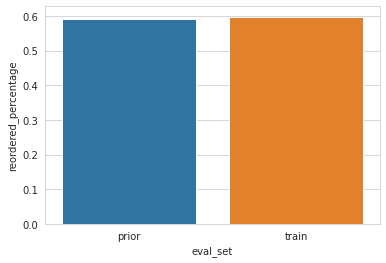

In [68]:
sns.barplot(x='eval_set', y='reordered_percentage' , data=target_var)

How many orders were place by every user and the highest order by user

In [12]:
orders_per_user= df_order.groupby(['user_id']) ['order_id'].aggregate(lambda group : len(group.unique())).reset_index()
orders_per_user

,user_id,order_id
0,1,11
1,2,15
2,3,13
3,4,6
4,5,5
...,...,...
6298,6299,39
6299,6300,12
6300,6301,9
6301,6302,21


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96]),
 <a list of 97 Text major ticklabel objects>)

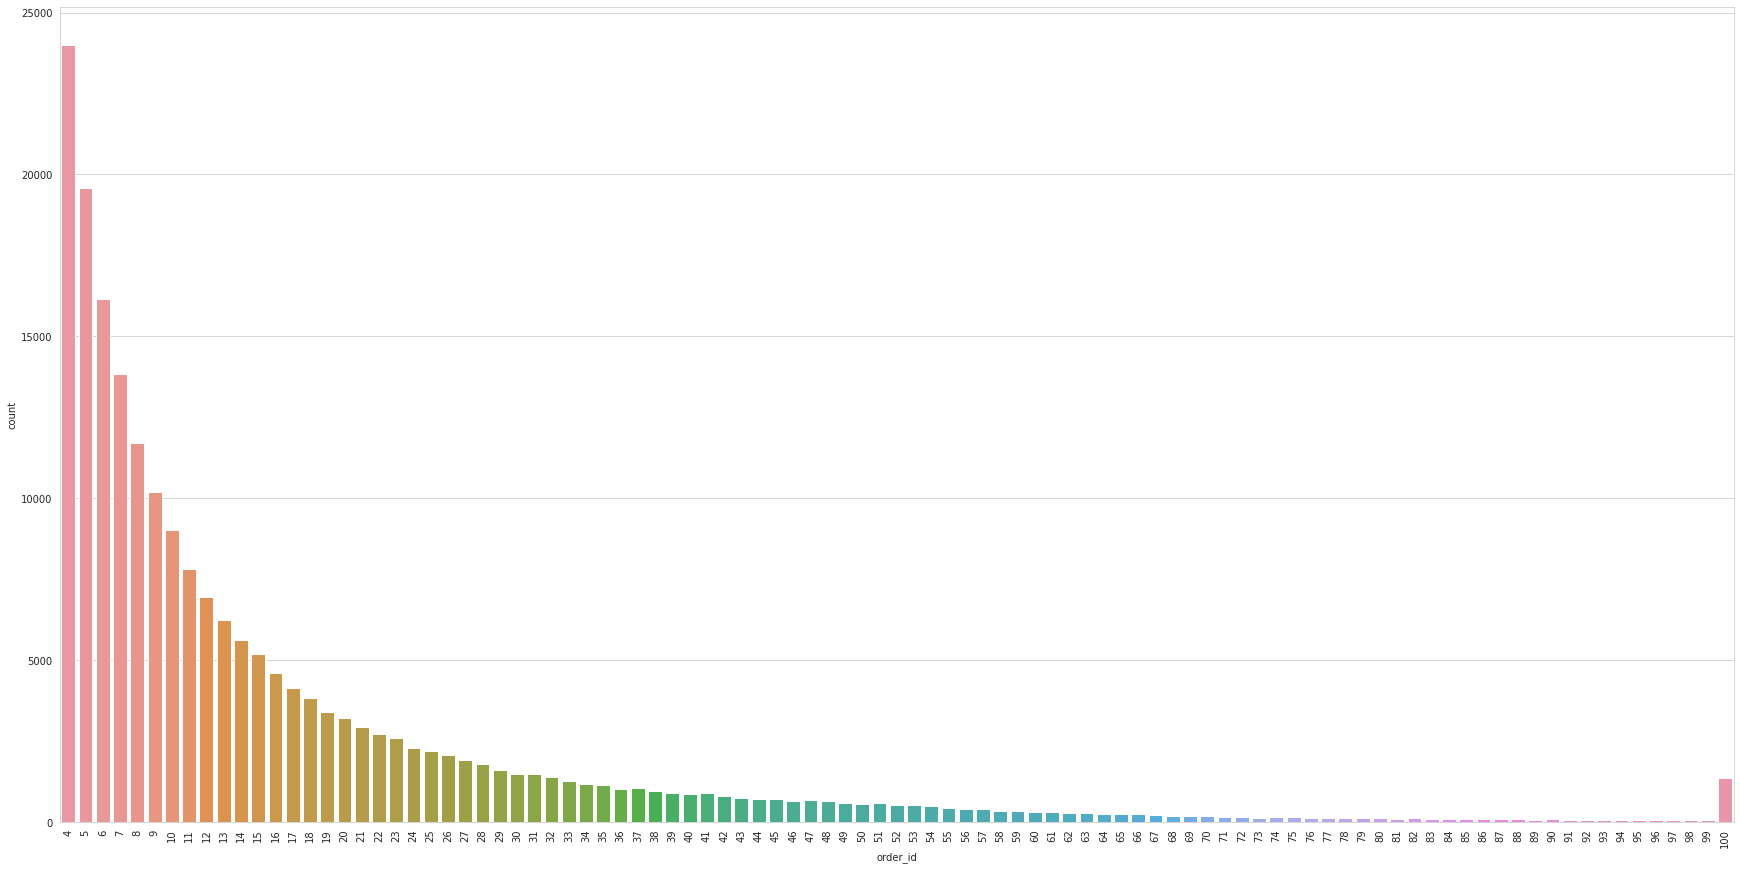

In [71]:
plt.figure(figsize=(30,15))
sns.countplot(x='order_id',data=orders_per_user)
plt.xticks(rotation='vertical')

### Most Frequently reordered products

In [72]:
reordered_products=prior_train_orders['product_name'].value_counts().reset_index().head(20)
reordered_products.columns=['product_name','frequency']
reordered_products

,product_name,frequency
0,Banana,16025
1,Bag of Organic Bananas,13078
2,Organic Strawberries,9019
3,Organic Baby Spinach,8305
4,Organic Hass Avocado,6799
5,Organic Avocado,6124
6,Large Lemon,5967
7,Strawberries,5200
8,Limes,4897
9,Organic Raspberries,4723


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

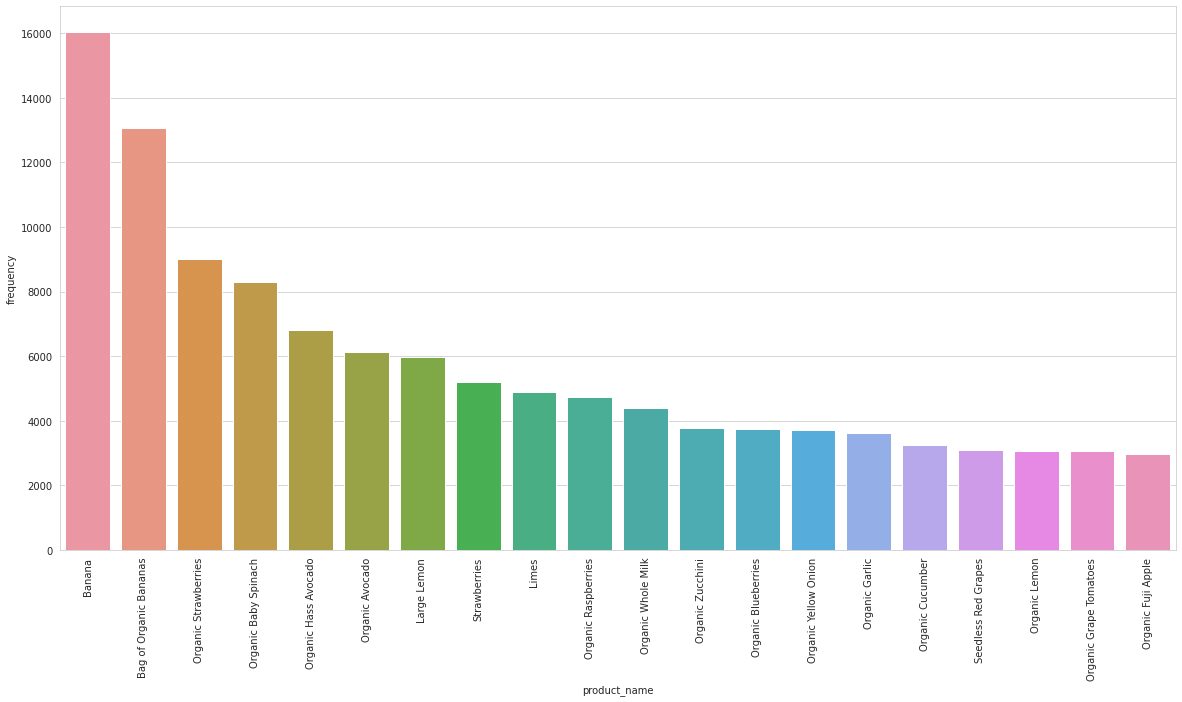

In [73]:
plt.figure(figsize=(20,10))
sns.barplot(x='product_name',y='frequency',data=reordered_products)
plt.xticks(rotation='vertical')

## Aisle that got most order

In [74]:
ordered_aisles=prior_train_orders['aisle'].value_counts().reset_index().head(20)
ordered_aisles.columns=['aisle_name','no_of_products_ordered']
ordered_aisles

,aisle_name,no_of_products_ordered
0,fresh fruits,125577
1,fresh vegetables,121739
2,packaged vegetables fruits,63239
3,yogurt,48202
4,packaged cheese,34215
5,water seltzer sparkling water,29693
6,milk,29226
7,chips pretzels,25252
8,soy lactosefree,22372
9,bread,19992


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

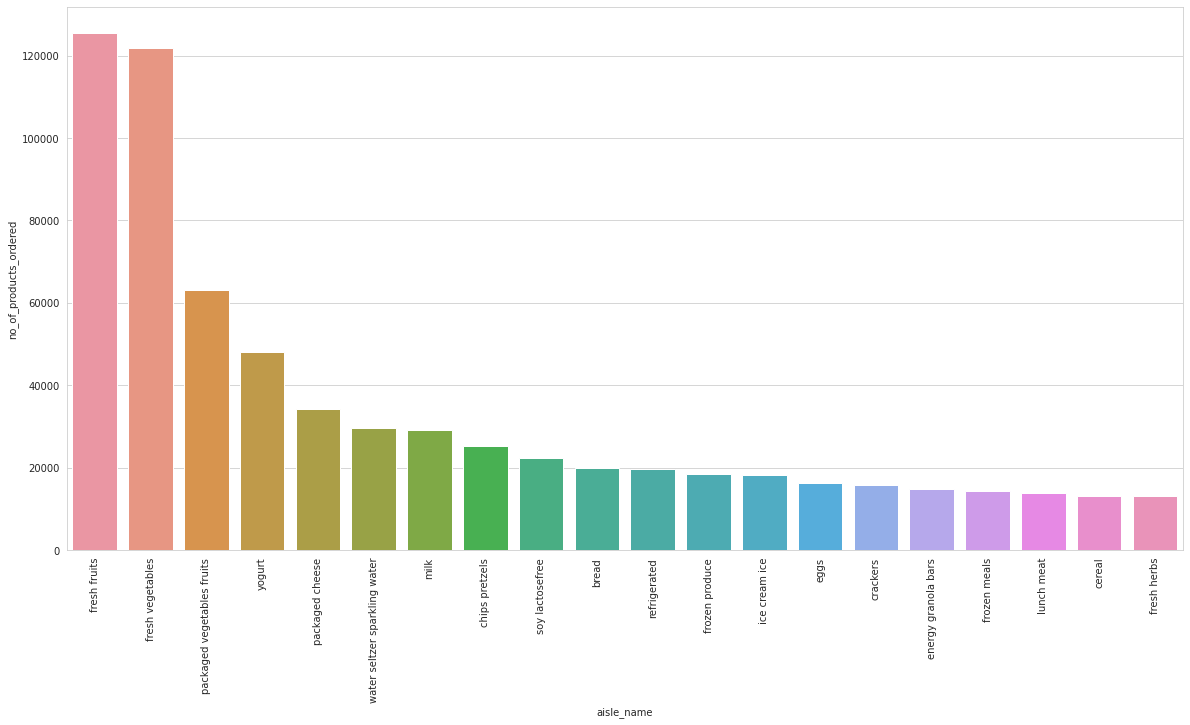

In [75]:
plt.figure(figsize=(20,10))
sns.barplot(x='aisle_name',y='no_of_products_ordered',data=ordered_aisles)
plt.xticks(rotation='vertical')

In [76]:
reordered_aisles=prior_train_orders.groupby(['aisle'])['reordered'].aggregate('sum').sort_values(ascending=False).reset_index().head(20)
reordered_aisles.columns=['aisle_name','no_of_products_reordered']

In [80]:
reordered_aisles['reordered_rate']= reordered_aisles['no_of_products_reordered']/ordered_aisles['no_of_products_ordered']

In [81]:
reordered_aisles.sort_values(by=['reordered_rate'], ascending=False, inplace=True)
reordered_aisles

,aisle_name,no_of_products_reordered,reordered_rate
5,water seltzer sparkling water,21668.0,0.729734
0,fresh fruits,91275.0,0.726845
6,packaged cheese,20201.0,0.691200
3,yogurt,32897.0,0.682482
9,bread,13582.0,0.679372
4,milk,22955.0,0.670905
8,chips pretzels,14979.0,0.669542
10,refrigerated,13040.0,0.657689
2,packaged vegetables fruits,40811.0,0.645345
11,eggs,11663.0,0.631525


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

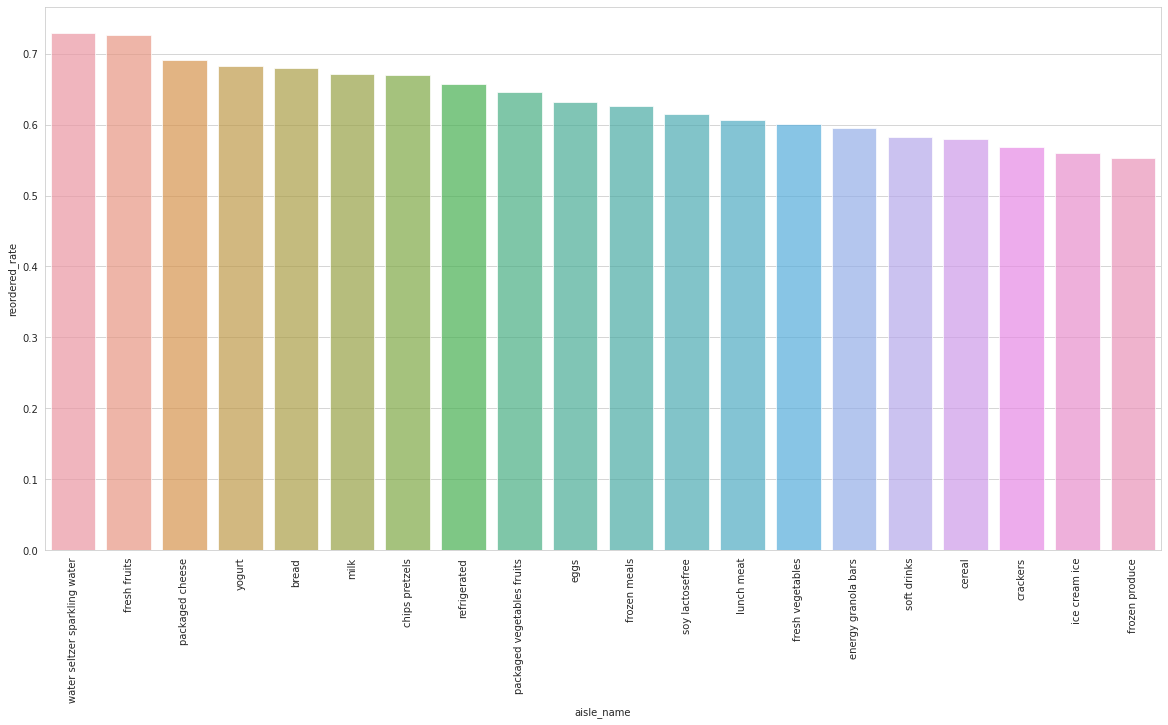

In [82]:
plt.figure(figsize=(20,10))
sns.barplot(x='aisle_name',y='reordered_rate',data=reordered_aisles, alpha=0.7)
plt.xticks(rotation='vertical')

### Departments that got high ordered

In [83]:
ordered_departments=prior_train_orders['department'].value_counts().reset_index().head(20)
ordered_departments.columns=['department_name','no_of_products_ordered']
ordered_departments

,department_name,no_of_products_ordered
0,produce,333748
1,dairy eggs,184653
2,snacks,99035
3,beverages,94062
4,frozen,80896
5,pantry,65826
6,bakery,40392
7,canned goods,37845
8,deli,36459
9,dry goods pasta,30731


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

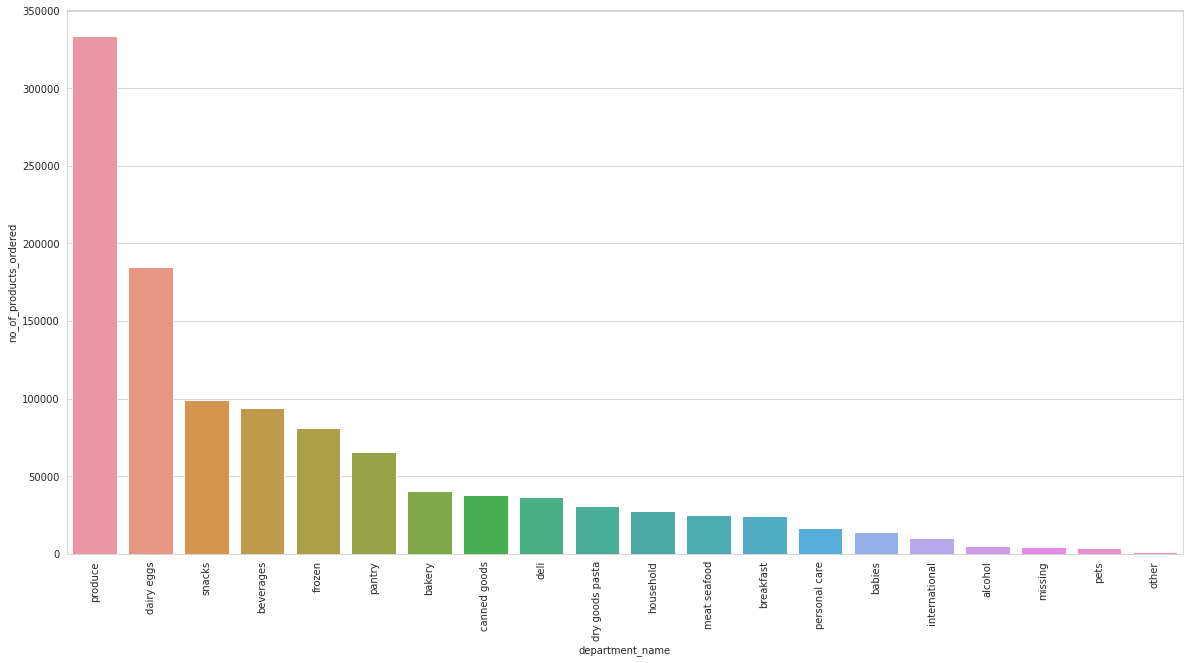

In [84]:
plt.figure(figsize=(20,10))
sns.barplot(x='department_name',y='no_of_products_ordered',data=ordered_departments)
plt.xticks(rotation='vertical')

In [85]:
reordered_departments=prior_train_orders.groupby(['department'])['reordered'].aggregate('sum').sort_values(ascending=False).reset_index().head(20)
reordered_departments.columns=['department_name','no_of_products_reordered']

reordered_departments['reorder_rate']= reordered_departments['no_of_products_reordered']/ordered_departments['no_of_products_ordered']

reordered_departments.sort_values(by=['reorder_rate'], ascending=False, inplace=True)
reordered_departments

,department_name,no_of_products_reordered,reorder_rate
1,dairy eggs,124055.0,0.671828
0,produce,219262.0,0.656969
2,beverages,61460.0,0.620589
3,snacks,57016.0,0.606153
7,deli,22311.0,0.589536
16,alcohol,2985.0,0.587830
6,pantry,23337.0,0.577763
11,breakfast,13871.0,0.559179
4,frozen,44331.0,0.548000
10,meat seafood,14304.0,0.520562


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

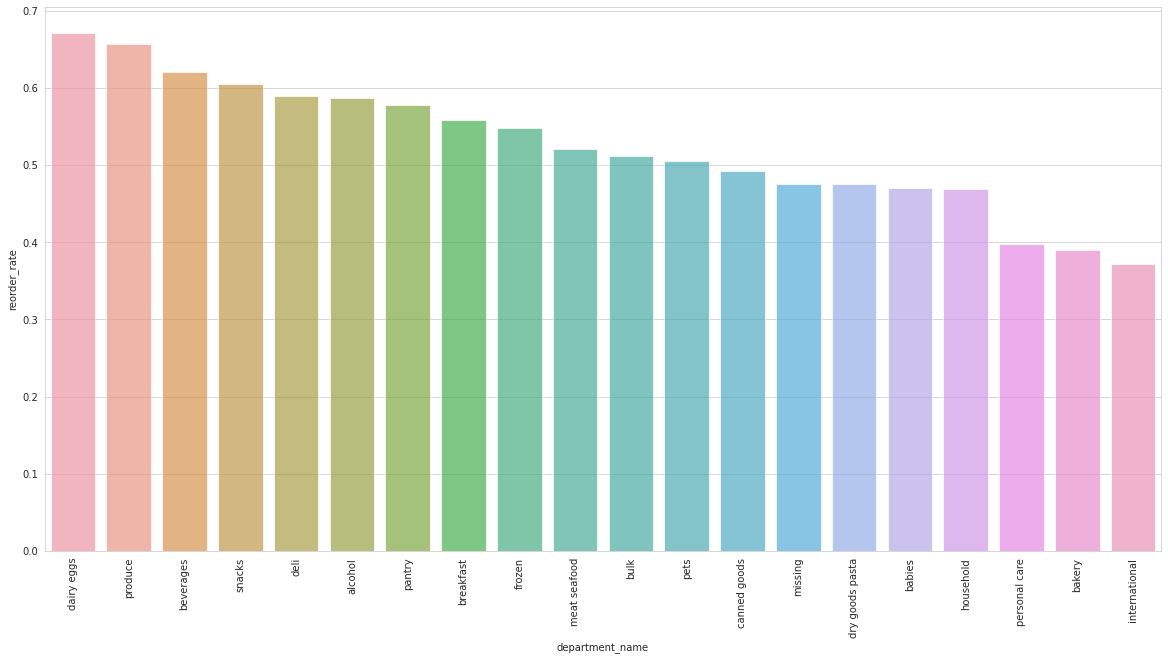

In [86]:
plt.figure(figsize=(20,10))
sns.barplot(x='department_name',y='reorder_rate',data=reordered_departments, alpha=0.7)
plt.xticks(rotation='vertical')

### CONCLUSION

1. The Most ordered Department are "Dairy eggs" and "Produce" 
2. The Most ordered Aisle are Fresh Fruit and Fresh Vegetables.
3. The Most ordered product are Banana

With the Exploratory Data Analysis above, we can do some action for increase the order, for example :
Make a bundle out of the most frequently purchased products with the least frequently purchased products, so the products that aren't selling well will be purchased and tasted by user. it will increase reorder probability. 